# <font color='green'> Calculate Molecular Properties From SMILES (CMPFS)</font> 
## <font color='orange'> This is a simple python based application to extract simple molecular properties from just SMILES. </font> 

#### <font color='purple'>SMILES (Simplified Molecular Input Line Entry System) codes are a type of notation used to represent molecular structure in a simple text-based format. They are commonly used in cheminformatics and computational chemistry to represent chemical compounds in a machine-readable format.</font> 

#### <font color='purple'> A SMILES code is a string of letters, digits, and symbols that describes the atoms, bonds, and connectivity of a molecule. The atoms are represented by their chemical symbols (e.g., C for carbon, N for nitrogen, O for oxygen) and are connected by bond symbols (e.g., - for single bond, = for double bond, # for triple bond). Additional symbols are used to represent aromatic atoms, chiral centers, and other features of the molecule.</font> 

#### For example, the SMILES code for water is "O" and the SMILES code for ethanol is "CCO". These codes can be used to generate 2D and 3D molecular structures.

#### <font color='purple'>SMILES codes are useful for storing, searching, and comparing molecular structures in databases, and for performing virtual screening and molecular docking studies. They are also used in various applications such as drug discovery, chemical analysis, and materials science.</font> 

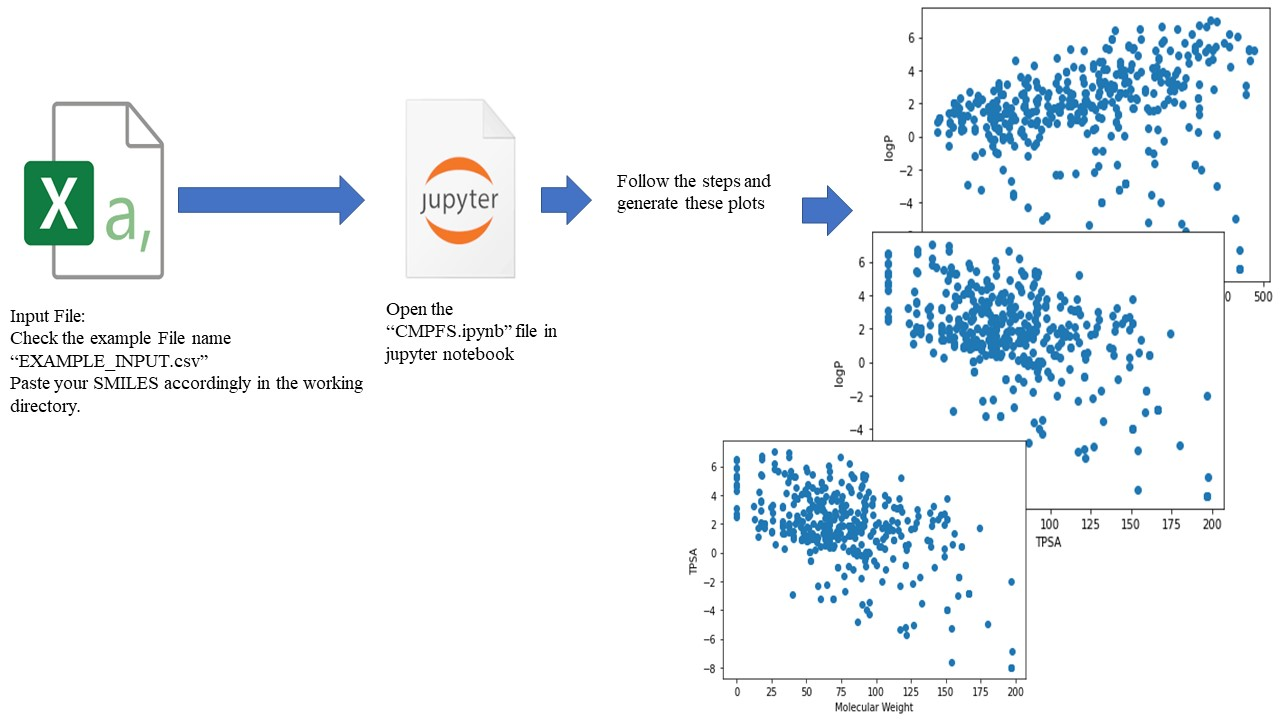

### Step -1: Installation of essential Libraries

In [68]:
#INSTALLATION FOR THE ESSENTIAL LIBRARIES
!pip install pandas
!pip install rdkit
!pip install matplotlib


In [69]:
#CALLING THE ESSENTIAL LIBRARY FUNCTIONS 
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

### Step-2 : Uploading input file

In [70]:


# Create a file upload widget
upload = widgets.FileUpload(
    accept='.csv',  # only accept csv files
    multiple=False  # allow only one file to be uploaded
)
display(upload)

# Wait for the user to upload a file
upload.wait_for_upload()

# Get the file data and convert it to a DataFrame
file_data = upload.data[list(upload.data.keys())[0]]
df = pd.read_csv(file_data)

FileUpload(value={}, accept='.csv', description='Upload')

AttributeError: 'FileUpload' object has no attribute 'wait_for_upload'

In [83]:
#showing the smiles output
df


,SMILES
0,C1CC2C(C(C1O2)C(=O)O)C(=O)O
1,C1CC2C(C(C1O2)C(=O)O)C(=O)O
2,C1CC2C(C(C1O2)C(=O)O)C(=O)O
3,C1=CC=C2C(=C1)C(=CC(=O)C2=O)O
4,CC1=CC(=O)OC2=C1C=CC(=C2)O
...,...
416,C1=CC=C(C=C1)C2(C(=O)N(C(=O)N2)COP(=O)(O)O)C3=...
417,C1=CC=C(C=C1)C2(C(=O)N(C(=O)N2)COP(=O)([O-])[O...
418,C1=CC=C(C=C1)C2(C(=O)NC(=N2)[O-])C3=CC=CC=C3
419,C1=CC=C(C=C1)C2(C(=O)NC(=N2)[O-])C3=CC=CC=C3.[...


### Step 3: Calculating properties from SMILES

In [72]:
#CONVERSION OF SMILES TO RDk MOLECULES:
mols = [Chem.MolFromSmiles(x) for x in df['SMILES']]


In [73]:
# Compute drug-likeliness properties
logP_values = [rdMolDescriptors.CalcCrippenDescriptors(x)[0] for x in mols]
MW_values = [rdMolDescriptors.CalcExactMolWt(x) for x in mols]


### Step 3: Plotting the results

Text(0, 0.5, 'logP')

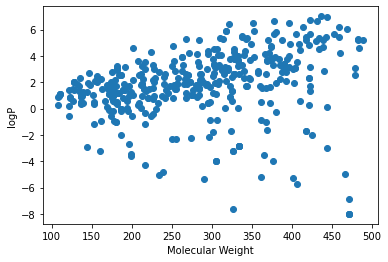

In [74]:
# Plot the data
plt.scatter(MW_values, logP_values)
plt.xlabel('Molecular Weight')
plt.ylabel('logP')

In [75]:
tpsa_values = [rdMolDescriptors.CalcTPSA(x) for x in mols]
hba_values = [rdMolDescriptors.CalcNumHBA(x) for x in mols]
hbd_values = [rdMolDescriptors.CalcNumHBD(x) for x in mols]
heavy_atoms_count = [rdMolDescriptors.CalcNumHeavyAtoms(x) for x in mols]
rotatable_bonds_count = [rdMolDescriptors.CalcNumRotatableBonds(x) for x in mols]







Text(0, 0.5, 'logP')

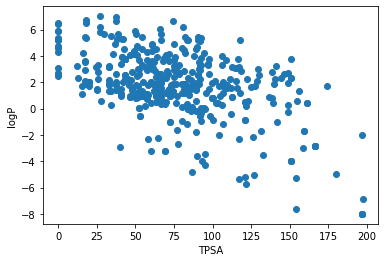

In [76]:
plt.scatter(tpsa_values, logP_values)
plt.xlabel('TPSA')
plt.ylabel('logP')



Text(0, 0.5, 'TPSA')

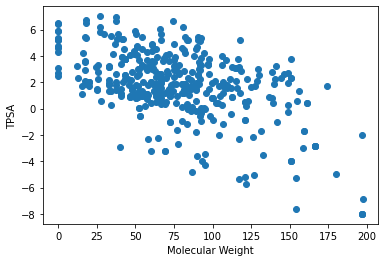

In [77]:
plt.scatter(tpsa_values, logP_values)
plt.xlabel('Molecular Weight')
plt.ylabel('TPSA')

Text(0, 0.5, 'Molecular Weight')

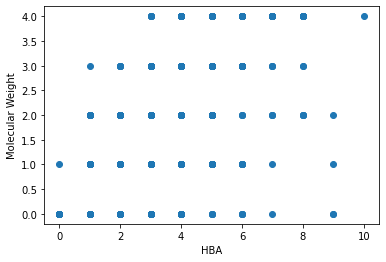

In [78]:
plt.scatter(hba_values, hbd_values)
plt.xlabel('HBA')
plt.ylabel('Molecular Weight')
